#### Leo Archivos

In [18]:
import numpy as np
from astropy.io import ascii


# Read UHECR
filename_e = '../data/Auger/events_a8_lb.dat'
events_a8 = ascii.read(filename_e)

# Read Gxs
filename_g = '../data/VLS/2MRSxWISE_VLS.txt'
data = ascii.read(filename_g)

print('Gxs DEC range:%5.2fdeg - %5.2fdeg' % (data['_DEJ2000'].min(),data['_DEJ2000'].max()))
print('Gxs RA range:%5.2fdeg - %5.2fdeg' % (data['_RAJ2000'].min(),data['_RAJ2000'].max()))

print('UHECR DEC range:%5.2fdeg - %5.2fdeg' % (events_a8['dec'].min(),events_a8['dec'].max()))
print('UHECR RA range:%5.2fdeg - %5.2fdeg' % (events_a8['RA'].min(),events_a8['RA'].max()))


Gxs DEC range:-87.77deg - 44.95deg
Gxs RA range: 0.81deg - 359.86deg
UHECR DEC range:-89.90deg - 44.70deg
UHECR RA range: 0.00deg - 360.00deg


#### Genero catalogos random

In [19]:
ra_min = np.min(data['_RAJ2000'])
ra_max = np.max(data['_RAJ2000'])
dec_min = np.min(data['_DEJ2000'])
dec_max = np.max(data['_DEJ2000'])
print('ra range = %f .. %f' % (ra_min, ra_max))
print('dec range = %f .. %f' % (dec_min, dec_max))

np.random.seed(12837612)
ntot = len(data['_DEJ2000'])
rand_ra1 = np.random.uniform(ra_min, ra_max, ntot*10)
rand_sindec1 = np.random.uniform(np.sin(dec_min*np.pi/180.), np.sin(dec_max*np.pi/180.), ntot*10)
rand_dec1 = np.arcsin(rand_sindec1)*180./np.pi
print('ran1 ra range = %f .. %f' % (rand_ra1.min(), rand_ra1.max()))
print('ran1 dec range = %f .. %f' % (rand_dec1.min(), rand_dec1.max()))


np.random.seed(12837613)
rand_ra2 = np.random.uniform(ra_min, ra_max, ntot*10)
rand_sindec2 = np.random.uniform(np.sin(dec_min*np.pi/180.), np.sin(dec_max*np.pi/180.), ntot*10)
rand_dec2 = np.arcsin(rand_sindec2)*180./np.pi
print('ran2 ra range = %f .. %f' % (rand_ra2.min(), rand_ra2.max()))
print('ran2 dec range = %f .. %f' % (rand_dec2.min(), rand_dec2.max()))

ra range = 0.812280 .. 359.856260
dec range = -87.772240 .. 44.954860
ran1 ra range = 0.820602 .. 359.847675
ran1 dec range = -87.744045 .. 44.948559
ran2 ra range = 0.812965 .. 359.848555
ran2 dec range = -87.742141 .. 44.954255


#### Ploteo todo por las dudas

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

gxs = SkyCoord(data['_RAJ2000'],data['_DEJ2000'],frame='icrs',unit='degree')
eve = SkyCoord(events_a8['RA'],events_a8['dec'],frame='icrs',unit='degree')
ran = SkyCoord(rand_ra1,rand_dec1,frame='icrs',unit='rad')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter(ran.ra.wrap_at(180*u.degree).to(u.rad),ran.dec.to(u.rad),s=.1,c='k',label='random')
ax.scatter(eve.ra.wrap_at(180*u.degree).to(u.rad),eve.dec.to(u.rad),s=.1,label='events')
ax.scatter(gxs.ra.wrap_at(180*u.degree).to(u.rad),gxs.dec.to(u.rad),s=5,c='r',label='galaxies')
ax.legend()
ax.grid(True)
plt.show()

ValueError: Latitude angle(s) must be within -90 deg <= angle <= 90 deg, got [-1501.28011647  1499.1157545   2409.80393483 ... -4011.57799641
 -2022.68575402  1111.98858482] deg

#### Autocorrelacion

[ 0.70161474  0.3632857   0.30177339  0.3170371   0.30257732  0.26272298
  0.20357131  0.11984544  0.0372137  -0.03020667 -0.08770634 -0.11390785
 -0.04640124 -0.06011508]


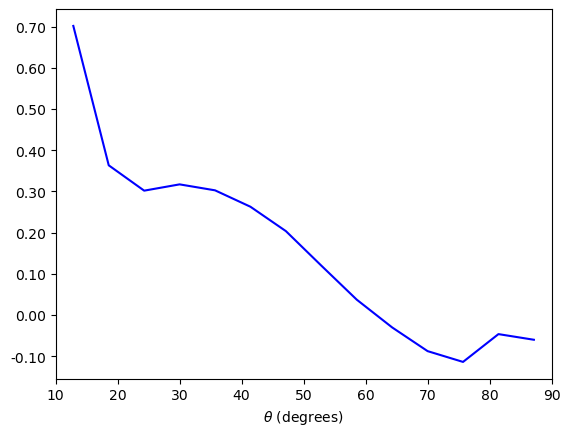

In [21]:
import numpy as np
import Corrfunc
from Corrfunc.mocks.DDtheta_mocks import DDtheta_mocks
from Corrfunc.utils import convert_3d_counts_to_cf
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick

bins = np.linspace(10., 90., 15)
nthreads = 1

DD = DDtheta_mocks(autocorr=1, RA1=data['_RAJ2000'], DEC1=data['_DEJ2000'],\
                   binfile=bins, nthreads=nthreads)

DR = DDtheta_mocks(autocorr=0, RA1=data['_RAJ2000'], DEC1=data['_DEJ2000'],\
                   RA2=rand_ra1, DEC2=rand_dec1, binfile=bins, nthreads=nthreads)

RR = DDtheta_mocks(autocorr=1, RA1=rand_ra1, DEC1=rand_dec1, \
                   binfile=bins, nthreads=nthreads)



[ 0.70161474  0.3632857   0.30177339  0.3170371   0.30257732  0.26272298
  0.20357131  0.11984544  0.0372137  -0.03020667 -0.08770634 -0.11390785
 -0.04640124 -0.06011508]
[ 0.70084816  0.36265887  0.30116652  0.31641916  0.30196285  0.26212562
  0.20300045  0.11930928  0.03671342 -0.03067727 -0.08814967 -0.11433262
 -0.04684797 -0.06054638]


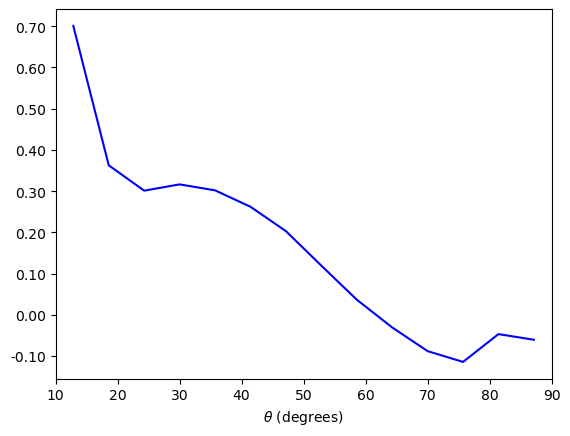

In [26]:

Nd = len(data)
#Nd2 = len(events_a8)
Nr = len(rand_ra1)
DDnorm = DD['npairs']/(Nd*(Nd-1))
DRnorm = DR['npairs']/(Nd*Nr)
RRnorm = RR['npairs']/(Nr*(Nr-1))

ls = (DDnorm-2*DRnorm+RRnorm)/RRnorm

cf = convert_3d_counts_to_cf(len(data), len(data), len(rand_ra1), len(rand_ra1),
                             D1D2=DD, D1R2=DR,
                             D2R1=DR, R1R2=RR)


print(ls)
print(cf)


fig, ax = plt.subplots()

r = (bins[1:] + bins[:-1]) / 2

pnoise = (1+cf)/np.sqrt(DD['npairs'])

np.savez('../data/corrfunc.npz',r,ls,pnoise)

ax.plot(r, cf, color='blue')

ax.set_xlabel(r'$\theta$ (degrees)')

ax.set_xlim([10,90])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

#### Crosscorrelation

In [4]:
import numpy as np
import Corrfunc
from Corrfunc.mocks.DDtheta_mocks import DDtheta_mocks
from Corrfunc.utils import convert_3d_counts_to_cf
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick
from astropy.io import ascii

# Read UHECR
filename_e = '../data/Auger/events_a8_lb.dat'
events_a8 = ascii.read(filename_e)

# Read Gxs
filename_g = '../data/VLS/2MRSxWISE_VLS.txt'
data = ascii.read(filename_g)

print('Gxs DEC range:%5.2fdeg - %5.2fdeg' % (data['_DEJ2000'].min(),data['_DEJ2000'].max()))
print('Gxs RA range:%5.2fdeg - %5.2fdeg' % (data['_RAJ2000'].min(),data['_RAJ2000'].max()))

print('UHECR DEC range:%5.2fdeg - %5.2fdeg' % (events_a8['dec'].min(),events_a8['dec'].max()))
print('UHECR RA range:%5.2fdeg - %5.2fdeg' % (events_a8['RA'].min(),events_a8['RA'].max()))

ra_min = np.min(data['_RAJ2000'])
ra_max = np.max(data['_RAJ2000'])
dec_min = np.min(data['_DEJ2000'])
dec_max = np.max(data['_DEJ2000'])
print('ra range = %5.2f - %5.2fdeg' % (ra_min, ra_max))
print('dec range = %5.2f - %5.2fdeg' % (dec_min, dec_max))

np.random.seed(12837612)
ntot = len(data['_DEJ2000'])
rand_ra1 = np.random.uniform(ra_min, ra_max, ntot*10)
rand_sindec1 = np.random.uniform(np.sin(dec_min*np.pi/180.), np.sin(dec_max*np.pi/180.), ntot*10)
rand_dec1 = np.arcsin(rand_sindec1)*180./np.pi
print('ran1 ra range = %5.2f - %5.2fdeg' % (rand_ra1.min(), rand_ra1.max()))
print('ran1 dec range = %5.2f - %5.2fdeg' % (rand_dec1.min(), rand_dec1.max()))


np.random.seed(12837613)
rand_ra2 = np.random.uniform(ra_min, ra_max, ntot*10)
rand_sindec2 = np.random.uniform(np.sin(dec_min*np.pi/180.), np.sin(dec_max*np.pi/180.), ntot*10)
rand_dec2 = np.arcsin(rand_sindec2)*180./np.pi
print('ran2 ra range = %5.2f - %5.2fdeg' % (rand_ra2.min(), rand_ra2.max()))
print('ran2 dec range = %5.2f - %5.2fdeg' % (rand_dec2.min(), rand_dec2.max()))


autocorr = 0
bins = np.linspace(10., 90., 15)
nthreads = 2

D1D2 = DDtheta_mocks(autocorr=0,RA1=data['_RAJ2000'],DEC1=data['_DEJ2000'],RA2=events_a8['RA'],DEC2=events_a8['dec'],binfile=bins,nthreads=nthreads)

D1R2 = DDtheta_mocks(autocorr=0,RA1=data['_RAJ2000'],DEC1=data['_DEJ2000'],RA2=rand_ra1,DEC2=rand_dec1,binfile=bins,nthreads=nthreads)

D2R1 = DDtheta_mocks(autocorr=0,RA1=events_a8['RA'],DEC1=events_a8['dec'],RA2=rand_ra2,DEC2=rand_dec2,binfile=bins,nthreads=nthreads)

R1R2 = DDtheta_mocks(autocorr=0,RA1=rand_ra1,DEC1=rand_dec1,RA2=rand_ra2,DEC2=rand_dec2,binfile=bins,nthreads=nthreads)

#############################################

from Corrfunc.utils import convert_3d_counts_to_cf

cf = convert_3d_counts_to_cf(len(data), len(events_a8), len(rand_ra1), len(rand_ra2),
                             D1D2=D1D2, D1R2=D1R2,
                             D2R1=D2R1, R1R2=R1R2)
print(cf)

############################################


Gxs DEC range:-87.77deg - 44.95deg
Gxs RA range: 0.81deg - 359.86deg
UHECR DEC range:-89.90deg - 44.70deg
UHECR RA range: 0.00deg - 360.00deg
ra range = 0.812280 .. 359.856260
dec range = -87.772240 .. 44.954860
ran1 ra range = 0.820602 - 359.845261deg
ran1 dec range = -87.713628 - 44.949192deg
ran2 ra range = 0.812965 - 359.812371deg
ran2 dec range = -87.574525 - 44.948203deg


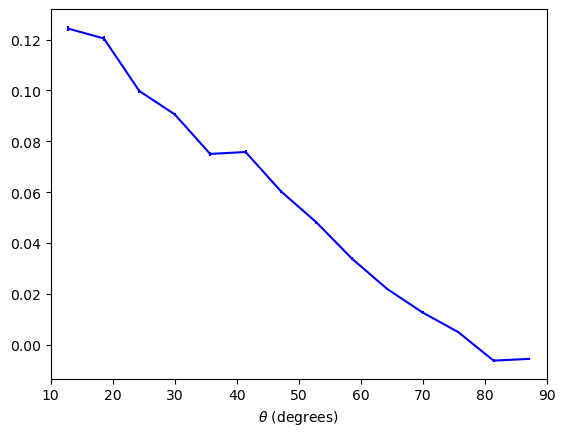

In [10]:

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick

fig, ax = plt.subplots()

r = (bins[1:] + bins[:-1]) / 2

#ax.plot(r, cf, color='blue')
ax.errorbar(r, cf, yerr=(1+cf)/np.sqrt(D1D2['npairs']),color='blue')

#ax.plot(r, -cf, color='blue', ls=':')
#ax.errorbar(r[xi>0], xi[xi>0], yerr=sig[xi>0], color='blue', lw=1)
#ax.errorbar(r[xi<0], -xi[xi<0], yerr=sig[xi<0], color='blue', lw=1)
#leg = ax.errorbar(-r, xi, yerr=sig, color='blue')

#ax.set_xscale('log')
#ax.set_yscale('log', nonpositive='clip')
ax.set_xlabel(r'$\theta$ (degrees)')

#ax.legend([leg], [r'$w(\theta)$'], loc='lower left')
ax.set_xlim([10,90])

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
#ax.xaxis.set_minor_formatter(mtick.FormatStrFormatter('%.0f'))

#plt.axis

plt.show()

#### Crosscorrelation Bright/Faint

In [16]:
import numpy as np
import Corrfunc
from Corrfunc.mocks.DDtheta_mocks import DDtheta_mocks
from Corrfunc.utils import convert_3d_counts_to_cf
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick
from astropy.io import ascii

# Read UHECR
filename_e = '../data/Auger/events_a8_lb.dat'
events_a8 = ascii.read(filename_e)

# Read Gxs
filename_g = '../data/VLS/2MRSxWISE_VLS.txt'
data = ascii.read(filename_g)

# Bright/Faint
data_bright = data[(data['K_abs']<-23.2)&(data['K_abs']>-26.)]
data_faint = data[(data['K_abs']>-23.2)&(data['K_abs']<-22.)]

#print('Gxs DEC range:%5.2fdeg - %5.2fdeg' % (data['_DEJ2000'].min(),data['_DEJ2000'].max()))
#print('Gxs RA range:%5.2fdeg - %5.2fdeg' % (data['_RAJ2000'].min(),data['_RAJ2000'].max()))


#Get min and max for RA and DEC in both samples
data_bright_decmin = data_bright['_DEJ2000'].min()
data_bright_decmax = data_bright['_DEJ2000'].max()
data_bright_ramin = data_bright['_RAJ2000'].min()
data_bright_ramax = data_bright['_RAJ2000'].max()
data_faint_decmin = data_faint['_DEJ2000'].min()
data_faint_decmax = data_faint['_DEJ2000'].max()
data_faint_ramin = data_faint['_RAJ2000'].min()
data_faint_ramax = data_faint['_RAJ2000'].max()

#Create random catalogue 1
np.random.seed(12837612)
ntot = len(data_bright['_DEJ2000'])
rand_ra1 = np.random.uniform(data_bright_ramin, data_bright_ramax, ntot*10)
rand_sindec1 = np.random.uniform(np.sin(data_bright_decmin*np.pi/180.), \
                                 np.sin(data_bright_decmax*np.pi/180.), ntot*10)
rand_dec1 = np.arcsin(rand_sindec1)*180./np.pi

print('Faint DEC range:%5.2fdeg - %5.2fdeg' % (data_faint['_DEJ2000'].min(),data_faint['_DEJ2000'].max()))
print('Faint RA range:%5.2fdeg - %5.2fdeg' % (data_faint['_RAJ2000'].min(),data_faint['_RAJ2000'].max()))
#print('UHECR DEC range:%5.2fdeg - %5.2fdeg' % (events_a8['dec'].min(),events_a8['dec'].max()))
#print('UHECR RA range:%5.2fdeg - %5.2fdeg' % (events_a8['RA'].min(),events_a8['RA'].max()))
print('ran1 ra range = %5.2f - %5.2fdeg' % (rand_ra1.min(), rand_ra1.max()))
print('ran1 dec range = %5.2f - %5.2fdeg' % (rand_dec1.min(), rand_dec1.max()))

#Create random catalogue 2
np.random.seed(12837613)
ntot = len(data_faint['_DEJ2000'])
rand_ra2 = np.random.uniform(data_faint_ramin, data_faint_ramax, ntot*10)
rand_sindec2 = np.random.uniform(np.sin(data_faint_decmin*np.pi/180.), \
                                 np.sin(data_faint_decmax*np.pi/180.), ntot*10)
rand_dec2 = np.arcsin(rand_sindec2)*180./np.pi
print('ran2 ra range = %5.2f - %5.2fdeg' % (rand_ra2.min(), rand_ra2.max()))
print('ran2 dec range = %5.2f - %5.2fdeg' % (rand_dec2.min(), rand_dec2.max()))


#autocorr = 0
bins = np.linspace(10., 90., 15)
nthreads = 2

#BRIGHT
D1D2_b = DDtheta_mocks(autocorr=0, RA1=data_bright['_RAJ2000'], DEC1=data_bright['_DEJ2000'],\
                       RA2=events_a8['RA'], DEC2=events_a8['dec'], binfile=bins, nthreads=nthreads)
D1R2_b = DDtheta_mocks(autocorr=0, RA1=data_bright['_RAJ2000'], DEC1=data_bright['_DEJ2000'],\
                       RA2=rand_ra1, DEC2=rand_dec1, binfile=bins, nthreads=nthreads)
D2R1_b = DDtheta_mocks(autocorr=0, RA1=events_a8['RA'], DEC1=events_a8['dec'],\
                       RA2=rand_ra2, DEC2=rand_dec2, binfile=bins, nthreads=nthreads)
R1R2_b = DDtheta_mocks(autocorr=0, RA1=rand_ra1, DEC1=rand_dec1,\
                       RA2=rand_ra2, DEC2=rand_dec2, binfile=bins, nthreads=nthreads)

cf_b = convert_3d_counts_to_cf(len(data_bright), len(events_a8), len(rand_ra1), len(rand_ra2),
                             D1D2=D1D2_b, D1R2=D1R2_b,
                             D2R1=D2R1_b, R1R2=R1R2_b)

#BRIGHT
D1D2_f = DDtheta_mocks(autocorr=0, RA1=data_faint['_RAJ2000'], DEC1=data_faint['_DEJ2000'],\
                       RA2=events_a8['RA'], DEC2=events_a8['dec'], binfile=bins, nthreads=nthreads)
D1R2_f = DDtheta_mocks(autocorr=0, RA1=data_faint['_RAJ2000'], DEC1=data_faint['_DEJ2000'],\
                       RA2=rand_ra1, DEC2=rand_dec1, binfile=bins, nthreads=nthreads)
D2R1_f = DDtheta_mocks(autocorr=0, RA1=events_a8['RA'], DEC1=events_a8['dec'],\
                       RA2=rand_ra2, DEC2=rand_dec2, binfile=bins, nthreads=nthreads)
R1R2_f = DDtheta_mocks(autocorr=0, RA1=rand_ra1, DEC1=rand_dec1,\
                       RA2=rand_ra2, DEC2=rand_dec2, binfile=bins, nthreads=nthreads)

cf_f = convert_3d_counts_to_cf(len(data_faint), len(events_a8), len(rand_ra1), len(rand_ra2),
                             D1D2=D1D2_f, D1R2=D1R2_f,
                             D2R1=D2R1_f, R1R2=R1R2_f)

############################################


Faint DEC range:-87.77deg - 44.91deg
Faint RA range: 5.00deg - 359.20deg
ran1 ra range =  0.83 - 359.82deg
ran1 dec range = -85.37 - 44.95deg
ran2 ra range =  5.00 - 359.15deg
ran2 dec range = -87.19 - 44.90deg


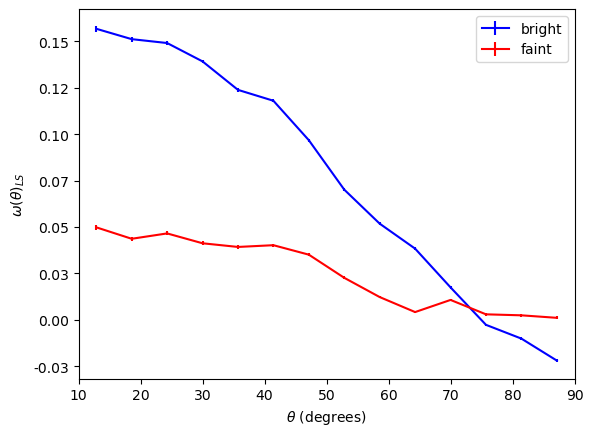

In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick

fig, ax = plt.subplots()

r = (bins[1:] + bins[:-1]) / 2

pnoise_b = (1+cf_b)/np.sqrt(D1D2_b['npairs'])
pnoise_f = (1+cf_f)/np.sqrt(D1D2_f['npairs'])

ax.errorbar(r, cf_b, yerr=pnoise_b,color='blue',label='bright')
ax.errorbar(r, cf_f, yerr=pnoise_f,color='red',label='faint')

ax.set_ylabel(r'$\omega(\theta)_{LS}$')
ax.set_xlabel(r'$\theta$ (degrees)')
ax.set_xlim([10,90])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.legend()
plt.savefig('../data/cross_corrfunc_bf.png')
plt.show()


np.savez('../data/corrfunc_cross_bright.npz',r,cf_b,pnoise_b)
np.savez('../data/corrfunc_cross_faint.npz',r,cf_f,pnoise_f)